In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)

from sklearn.datasets.samples_generator import make_circles
X1, y1 = make_circles(100, factor=.1, noise=.1)


def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

# Constrained optimization









## Bound Constraints
In many optimization problems, the optimization variables are constrained:

\begin{align*}
x_1\geq 0\\
a \leq x_2 \leq b
\end{align*}

where $a,b$ are some scalars. A way to solve optimization problems with bounded variables is to transform the problem so that constraints can be removed.

For instance, we can optimize the variable $x_1' \in \mathbb{R}$ and express $x_1 = \exp( x_1')$ (that is an invertible transformation), this ensures that $x_1 \geq 0$, while $x_1'$ is unconstrained. So we can use the methods from the previous weeks.

# Constrained Optimization
An optimization problem is more complicated if it is constrained, i.e.,
the arguments ${\bf x}=[x_1,\cdots,x_n]^T$ of the objective function 
$f({\bf x})$ are subject to certain equality or inequality constraints
in terms of what values they can take. Such a constrained optimization
problem can be formulated as:

\begin{equation}
  \begin{array}{ll}
    \mbox{optimize} & f({\bf x})=f(x_1,\cdots,x_n) \\
    \;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\\
    \mbox{subject to:} & 
    \left\{ \begin{array}{l} 
      h_i({\bf x})=0,\;\;\;\;\;i\in \{1,\cdots, \ell\}\\
      g_j({\bf x})\le 0,\;\;\;\;\;j\in \{1,\cdots, m\}
    \end{array} \right.
  \end{array}
\end{equation}
where the functions $h_i$ are called the equality constraints and $g_j$ the inequality constraints.

The set of all ${\bf x}$ satisfying the $m+\ell$ constraints is called
the **feasible region** of the problem. The goal is to find a point
${\bf x}^*$ in the feasible region at which $f({\bf x}^*)$ is an 
extremum. 




In the most general case where the objective function $f({\bf x})$ 
and the constraint functions $g_i({\bf x})$ and $h_j({\bf x})$ are 
nonlinear, the nonlinear optimization problem 
is called  *nonlinear programming* (NLP).

If  the equality constraints $h_i$ are linear functions (more precisely affine) and $f,g_j$ are convex functions, then the problem is *convex*.

If the 
objective function is quadratic while the constraints are linear, 
(the feasible region is a polytope), the problem is called 
*quadratic programming* (QP). 

If the objective 
function is linear as well as the constraints, the problem is called 
*linear programming* (LP). 

We will first consider the NLP in general, and then discuss more specifically 
QP and LP.

## Constrained Optimization via Lagrangian


Introduce the following scalars (called Lagrange multipliers) $\boldsymbol{\mu}=\{\mu_i\}_{i=1}^{m}$
with $\mu_i\geq0$, one for each inequality constraint, and $\boldsymbol{\lambda}=\{\lambda_j\}_{j=1}^{\ell}$, one for each equality constraint, and construct the following function (called Lagrangian)

$$
\mathcal{L}({\bf x}, \boldsymbol{\mu}, \boldsymbol{\lambda}) = f({\bf x}) + \sum_{i=1}^{m} \mu_i g_i({\bf x})  + \sum_{j=1}^{\ell} \lambda_j h_j({\bf x})
$$

Consider the optimization problem $\mathcal{L}_p({\bf x}) = \max_{\boldsymbol{\mu},\boldsymbol{\lambda}} \mathcal{L}({\bf x}, \boldsymbol{\mu}, \boldsymbol{\lambda})  $ and observe that

*  $\mathcal{L}_p({\bf x})=\infty$ if ${\bf x}$ violates the constraints ($g_i$ or $h_j$)
*  $\mathcal{L}_p({\bf x})=f({\bf x})$ if ${\bf x}$  satisfies all the constraints. 

Thus

$$
\min\limits_{{\bf x}} \mathcal{L}_p({\bf x}) = \min\limits_{{\bf x}} \max_{\boldsymbol{\mu},\boldsymbol{\lambda}} \mathcal{L}({\bf x}, \boldsymbol{\mu}, \boldsymbol{\lambda})  
$$

solves the same problem as the original problem and will have the same solution. Note that for convex $f , g , h$, the order of min and max is interchangeable.

Note that at the optimum the following conditions are satisfied

$$
\mu_j g_j ({\bf x})= 0
$$

that is either $\mu_j =0$ or $g_j ({\bf x})= 0$. This is a Karush-Kuhn-Tucker (KKT) condition,
see Book Equation (10.30).

### Example
Let us consider the following dataset

$$
D=\{1,1,1,0,0,2,0,0,1,1,2,2\}
$$

where Spam=1 means that the email is spam, $0$ means not spam and $2$ means unknown.

We define

$$
\begin{aligned}
p(S=0) &=\theta_1\\
p(S=1) &=\theta_2\\
p(S=2) &=\theta_3\\
\end{aligned}
$$

and so $\theta_i \in [0,1]$ and $\theta_1+\theta_2+\theta_3= 1$.

The likelihood of $D$ given $\theta$ is

$$
p(D|\theta)=\theta_1^{y_1} \theta_2^{y_2} \theta_3^{y_3}=\theta_1^4 \theta_2^{5} \theta_3^3
$$


Our goal is to find the maximum likelihood estimate of $\theta$

$$
\begin{array}{l}
\hat{\theta} =\arg\max_{\theta} \theta_1^4 \theta_2^{5} \theta_3^3\\
s.t.\\
-\theta_i \leq 0\\
\theta_1+\theta_2+\theta_3=1
\end{array}
$$

or, equivalently,

$$
\begin{array}{l}
\hat{\theta} =\arg\max_{\theta} 4\log(\theta_1)+5\log(\theta_2) + 3\log(\theta_3)\\
s.t.\\
-\theta_i \leq 0\\
\theta_1+\theta_2+\theta_3=1
\end{array}
$$

This a nonlinear optimization problem because the objective function is nonlinear. 


We first write the Lagrangian using the Lagrangian multipliers corresponding to the constraint $1-\theta_1-\theta_2-\theta_3=0$

$$
\mathcal{L}(\theta, \mu) =4\log(\theta_1)+5\log(\theta_2) + 3\log(\theta_3) + \mu(1-\theta_1-\theta_2-\theta_3)
$$

The derivative w.r.t. $\mu$ is

$$
\frac{d}{d \mu} \mathcal{L}(\theta, \mu)=1-\theta_1-\theta_2-\theta_3
$$

Setting this derivative to zero gives

$$
0 = 1-\theta_1-\theta_2-\theta_3
$$


For fixed $\mu$ we can compute the derivative

$$
\frac{d}{d \theta_i} \mathcal{L}(\theta, \mu) = y_i \frac{1}{\theta_i} - \mu 
$$
where $y_1=4,y_2=5,y_3=3$ (counts). Setting this derivative to zero gives

$$
\theta_i = \frac{y_i}{\mu}
$$

and exploiting $0 = 1-\theta_1-\theta_2-\theta_3$ we can derive 

$$
\mu=y_1+y_2+y_3 ~~~\text{ and }~~~ \hat{\theta}_i=\frac{y_i}{y_1+y_2+y_3}
$$

This is what multinomial Naive-Bayes computes during data fitting:

$$
\hat{\theta}_1=\frac{4}{12},~~\hat{\theta}_2=\frac{5}{12},~~\hat{\theta}_3=\frac{3}{12}
$$

### Support Vector Machines

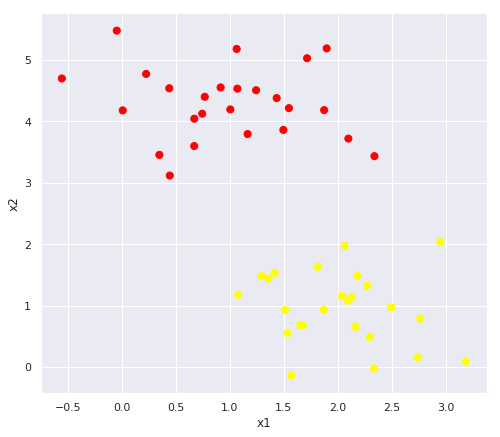

In [28]:
plt.figure(figsize=(8,7))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');
plt.xlabel("x1")
plt.ylabel("x2");

## What is a hyperplane?
Equation of a hyperplane:

$$
w_1 x_1 + \dots w_m x_m +b=0
$$

where $w_1,\dots,w_m,b$ are real numbers.

2D example (a line):

$$
2x_1-x_2+1=0
$$

or, equivalently,

$$
x_2=2x_1-1
$$

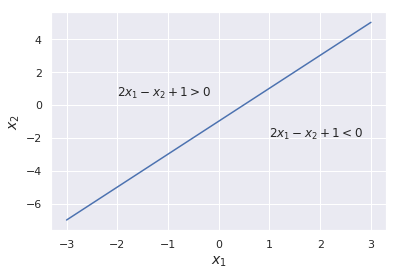

In [17]:
x1 = np.linspace(-3,3)
plt.plot(x1,2*x1-1)
plt.xlabel("$x_1$",fontsize=14)
plt.ylabel("$x_2$",fontsize=14)
plt.text(-2,0.5,"$2x_1-x_2+1>0$");
plt.text(1,-2,"$2x_1-x_2+1<0$");

### Linear classifier

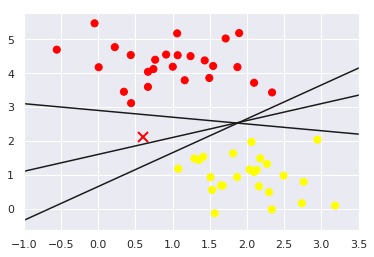

In [51]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5);

These are three *very* different separators which, nevertheless, perfectly discriminate between these samples.
Depending on which you choose, a new data point (e.g., the one marked by the "X" in this plot) will be assigned a different label!

**Logistic regression** finds an optimal line: the line that maximises the likelihood function, that is the line that
guarantees that
$$
\phi(w_1 x_1 +w_2 x_2+ b)
$$
is a *calibrated* probability.

However, we can find an alternative solution by thinking geometrically instead of probabistically.

### Support Vector Machines: Maximizing the *Margin*

Support vector machines offer another way to solve this.
The intuition is this: rather than simply drawing a zero-width line between the classes, we can draw around each line a *margin* of some width, up to the nearest point.
Here is an example of how this might look:

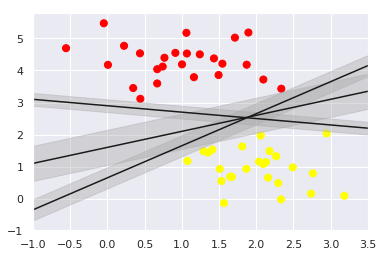

In [52]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)
plt.xlim(-1, 3.5);

In support vector machines, the line that maximizes this margin is the one we will choose as the optimal model.
Support vector machines are an example of such a *maximum margin* estimator. Large margins intuitively mean good generalization.



#### Fitting a support vector machine

How can we find that optimal line? First of all, let us denote the class
values as 1 and -1 (for convenience).

We aim to find the parameters $w=[w_1,w_2]$ and $b$ such that

$$
\begin{array}{l}
w_1 x_1^{(i)} + w_2 x_2^{(i)}+b >0, ~~~~\forall~~ (x^{(i)},1)\\
w_1 x_1^{(i)} + w_2 x_2^{(i)}+b <0, ~~~~\forall~~ (x^{(i)},-1)
\end{array}
$$

and, therefore, $w_1 x_1^{(i)} + w_2 x_2^{(i)}+b=0$ is the separating hyperplane.


Strict inequalities cannot be expressed "numerically" and, therefore, in practice we define it as

$$
\begin{array}{l}
w_1 x_1^{(i)} + w_2 x_2^{(i)}+b \geq\epsilon, ~~~~\forall~~ (x^{(i)},1)\\
w_1 x_1^{(i)} + w_2 x_2^{(i)}+b \leq -\epsilon, ~~~~\forall~~ (x^{(i)},-1)
\end{array}
$$

for some small $\epsilon$. However, we observe that, by dividing for epsilon, the above problem can be written as

$$
\begin{array}{l}
w_1 x_1^{(i)} + w_2 x_2^{(i)}+b \geq 1, ~~~~\forall~~ (x^{(i)},1)\\
w_1 x_1^{(i)} + w_2 x_2^{(i)}+b \leq -1, ~~~~\forall~~ (x^{(i)},-1)
\end{array}
$$

with an abuse of notation, we have used the same symbols for the weights $w_i=w_i/\epsilon$ and $b=b/\epsilon$.

Therefore, we have the constraints and now we need to define the margin.


First, observe that we can rewrite the two constraints as

$$
y^{(i)}(w_1 x_1^{(i)} + w_2 x_2^{(i)}+b) \geq 1,
$$

and also note that

$$
\min_{i} |w_1 x_1^{(i)} + w_2 x_2^{(i)}+b| =1
$$

because 



the vector $[w_1,w_2]$ is always normal to the hyperplane  $w_1 x_1^{(i)} + w_2 x_2^{(i)}+b=0$

Let $(x_1^{(0)},x_2^{(0)})$ be a point in the hyperplane $w_1 x_1 + w_2 x_2+b=-1$, i.e.,$w_1 x_1^{(0)} + w_2 x_2^{(0)}+b=0$. 

To measure the distance between hyperplanes $w_1 x_1 + w_2 x_2+ b=-1$ and $w_1 x_1 + w_2 x_2+b=1$, we only need to compute the perpendicular distance from $(x_1^{(0)},x_2^{(0)})$ to plane  $w_1 x_1 + w_2 x_2+b=1$, denoted as $r$.

Note that $\frac{\textbf{w}}{\|\textbf{w}\|}$ with $\textbf{w}=[w_1,w_2]$ is a unit normal vector of the hyperplane $w_1 x_1 + w_2 x_2+b=1$. We have

$$
\textbf{w}^T\left(\textbf{x}^{(0)} + r\frac{\textbf{w}}{\|\textbf{w}\|}\right) + b = 1
$$

Expanding this equation (and using $\textbf{w}^T\textbf{w}=\|\textbf{w}\|^2$), we have

\begin{align*}
&\textbf{w}^T\textbf{x}^{(0)} + r\|\textbf{w}\| + b = 1 \\
\implies &\textbf{w}^T\textbf{x}^{(0)} + b = 1 - r\|\textbf{w}\| \\
\implies &-1 = 1 - r\|\textbf{w}\|\\
\implies & r = \frac{2}{\|\textbf{w}\|}
\end{align*}

We want to maximize the margin $\frac{2}{\|\textbf{w}\|}$, which is equivalent to minimizing $\|\textbf{w}\|/2$.

**Hard Margin SVM**

$$
\begin{array}{l}
\min\limits_{{\bf w},b} \dfrac{||{\bf w}||^2}{2}\\~
s.t.\\
y^{(i)}({\bf w}^T {\bf x}^{(i)} +b) \geq 1, ~~~~\forall~~i=1,\dots,n
\end{array}
$$

This gives the hard-margin SVM, which minimizes a convex objective function which is a Quadratic Program
(QP) with $n$ linear inequality constraints.

**Soft Margin SVM**

$$
\begin{array}{l}
\min\limits_{{\bf w},b, \boldsymbol{ \xi}}  \dfrac{||{\bf w}||^2}{2}+C \sum_{i=1}^n \xi_i\\~
s.t.\\
y^{(i)}({\bf w}^T {\bf x}^{(i)} +b) \geq 1-\xi_i, ~~~~\forall~~i=1,\dots,n\\
\xi_i\geq0\\
\end{array}
$$

Allow some training examples to fall within the margin region, or be even misclassified (i.e., fall on
the wrong side).

Parameter C controls the trade-off between large margin vs small training error

## Dual problem (for the Hard SVM)

Let us introduce Lagrange Multipliers $\boldsymbol{\mu}=\{\mu_1,\dots, \mu_n\}$, one for each constraint, and solve the following Lagrangian:
    
$$
 \min\limits_{{\bf w},b} \max_{\boldsymbol{\mu}\geq 0} \mathcal{L}({\bf w},b, \boldsymbol{\mu})= \max_{\boldsymbol{\mu}\geq 0} \min\limits_{{\bf w},b}  \mathcal{L}({\bf w},b, \boldsymbol{\mu})= \max_{\boldsymbol{\mu}\geq 0} \min\limits_{{\bf w},b}  \dfrac{||{\bf w}||^2}{2}+\sum_{i=1}^n \mu_i(1-y^{(i)}({\bf w}^T {\bf x}^{(i)} +b))
$$

The first equality holds because the Lagrangian is convex, because the norm is a quadratic function (and so convex) and the second function is linear (and so convex). The nonnegative sum of two convex functions is convex.

We will solve this Lagrangian by solving a dual problem (eliminate ${\bf w},b$ and solve for the "dual
variables" $\boldsymbol{\mu}$ )

## Derivation
Take (partial) derivatives of $\mathcal{L}$ w.r.t. ${\bf w},b$ and set them to zero:

$$
\frac{\partial}{\partial {\bf w}} \mathcal{L}({\bf w},b, \boldsymbol{\mu})=0 ~~ \rightarrow  ~~ \mathbf{w}=\sum_{i=1}^n \mu_iy^{(i)}{\bf x}^{(i)}
$$

$$
\frac{\partial}{\partial b} \mathcal{L}({\bf w},b, \boldsymbol{\mu})=0 ~~ \rightarrow  ~~ \sum_{i=1}^n \mu_iy^{(i)}=0
$$



## Derivation

Substituting $\mathbf{w}=\sum_{i=1}^n \mu_iy^{(i)}{\bf x}^{(i)}$ in Lagrangian and using $\sum_{i=1}^n \mu_iy^{(i)}=0$ we obtain

\begin{align*}
&\max_{\boldsymbol{\mu}\geq 0} \mathcal{L}_D( \boldsymbol{\mu}) = \sum_{i=1}^n \mu_i-\frac{1}{2} \sum_{i=1}^n \sum_{j=1}^n \mu_i  \mu_j y_i y_j ({\bf x}^{(i)})^T {\bf x}^{(j)}\\
&s.t.\\
&\sum_{i=1}^n \mu_iy^{(i)}=0
\end{align*}

**Good news:** This is maximizing a **concave** function (or minimizing a convex function).

## Kernel version
We can write as

\begin{align*}
&\max_{\boldsymbol{\mu}\geq 0} \mathcal{L}_D( \boldsymbol{\mu}) = \sum_{i=1}^n \mu_i-\frac{1}{2} \sum_{i=1}^n \sum_{j=1}^n \mu_i  \mu_j y_i y_j K({\bf x}^{(i)}, {\bf x}^{(j)})\\
&s.t.\\
&\sum_{i=1}^n \mu_iy^{(i)}=0
\end{align*}

where $K({\bf x}^{(i)}, {\bf x}^{(j)})=({\bf x}^{(i)})^T{\bf x}^{(j)}$ in the linear case. We can replace the linear kernel with a RBF kernel and obtain a SVM RBF.


## How do we solve this optimization problem ?

A quadratic program is an optimization problem, where the objective function is
quadratic and the constraints are linear. 

Common approaches for solving such problems include algorithms such as
the

* penalty method
* interior point method
* augmented Lagrange method
* conjugate gradient.



## Penalty method
We can use penalty methods to convert constrained optimization problems into
unconstrained optimization problems by adding penalty terms to the objective
function, allowing us to use the methods developed in previous weeks.



## Barrier method
* It makes inequality constraints implicit in the objective
\begin{eqnarray*}
    &\text{minimize}& f(\mathbf{x}) + \sum_{i=1}^m I_-(g_i(\mathbf{x})) \\
    &\text{subject to}& \mathbf{A} \mathbf{x} = \mathbf{b},
\end{eqnarray*}
where
\begin{eqnarray*}
    I_-(u) = \begin{cases}
    0 & u \le 0 \\
    \infty & u > 0
    \end{cases}.
\end{eqnarray*}

* The idea of the barrier method is to approximate $I_-$ by a differentiable function
\begin{eqnarray*}
    \hat I_-(u) = - (1/t) \log (-u), \quad u < 0,
\end{eqnarray*}
where $t>0$ is a parameter tuning the approximation accuracy. As $t$ increases, the approximation becomes more accurate.

 The **barrier method** solves a sequence of equality-constraint problems
 
\begin{eqnarray*}
    &\text{minimize}& t f(\mathbf{x}) - \sum_{i=1}^m \log(-g_i(\mathbf{x})) \\
    &\text{subject to}& \mathbf{A} \mathbf{x} = \mathbf{b},
\end{eqnarray*}

increasing the parameter $t$. The above problem can be solved using a variant of Newton method.

* The function $\phi(\mathbf{x}) = - \sum_{i=1}^m \log (-g_i(\mathbf{x}))$ is called the **logarithmic barrier** or **log barrier** function.
    
* Denote the solution at $t$ by $\mathbf{x}^\star(t)$. Using duality theory, it can be shown

\begin{eqnarray*}
    f(\mathbf{x}^\star(t)) - p^\star \le m / t.
\end{eqnarray*}


* Feasibility and phase I methods. Barrier method has to start from a **strictly feasible point**. We can find such a point by solving

\begin{eqnarray*}
    &\text{minimize}& s \\
    &\text{subject to}& g_i(\mathbf{x}) \le s, \quad i = 1,\ldots,m \\
    & & \mathbf{A} \mathbf{x} = \mathbf{b}
\end{eqnarray*}
by the barrier method.

## CVXOPT
We will instead use a library to solve data fitting for SVM. CVXOPT is a library that allows us to write down and solve any convex optimization problem expressed in the following **canonical** form:

\begin{align*}
&\min\limits_{{\bf x}} \frac{1}{2} {\bf x}^T {\bf P} {\bf x} +  {\bf q}^T{\bf x}\\
&s.t.\\
& {\bf G} {\bf x}\leq {\bf h }\\
&{\bf A} {\bf x}={\bf b}
\end{align*}

where ${\bf P},{\bf A}, {\bf G}, {\bf q}, {\bf h}, {\bf b}$ are given matrices (or vector ${\bf q}, {\bf h}, {\bf b}$) of numbers.

    cvxopt.solvers.qp(P, q, G, h, A, b)



First of all, we need to reformulate the SVM data fitting problem in matrix form:

\begin{align*}
&\min \frac{1}{2} \boldsymbol{\mu}^T H \boldsymbol{\mu}- {\bf 1}^T\boldsymbol{\mu}\\
&s.t.\\
& -\boldsymbol{\mu}\leq 0\\
&\mathbf{y}^T \boldsymbol{\mu}=0
\end{align*}

where $H$ is a matrix whose element in the i-th row and j-th column is $H_{ij}=y_i y_j ({\bf x}^{(i)})^T {\bf x}^{(j)}$.

In [30]:
#Importing with custom names to avoid issues with numpy / sympy matrix
from cvxopt import matrix as cvxopt_matrix
from cvxopt import solvers as cvxopt_solvers

#Initializing values and computing H. Note the 1. to force to float type
m,n = X.shape
y1 = np.where(y==0,-1,1).reshape(-1,1) * 1. #THIS IS FUNDAMENTAL
H =  np.dot(X,X.T)*(y1.dot(y1.T))

#Converting into cvxopt format
P = cvxopt_matrix(H)
q = cvxopt_matrix(-np.ones((m, 1)))
G = cvxopt_matrix(-np.eye(m))
h = cvxopt_matrix(np.zeros(m))
A = cvxopt_matrix(y1.reshape(1, -1))
b = cvxopt_matrix(np.zeros(1))


In [31]:
#Setting solver parameters (change default to decrease tolerance) 
cvxopt_solvers.options['show_progress'] = False
cvxopt_solvers.options['abstol'] = 1e-10
cvxopt_solvers.options['reltol'] = 1e-10
cvxopt_solvers.options['feastol'] = 1e-10

#Run solver
sol = cvxopt_solvers.qp(P, q, G, h, A, b)
mu = np.array(sol['x'])

In [32]:
#w parameter in vectorized form
w = ((y1 * mu).T @ X).reshape(-1,1)

#Selecting the set of indices S corresponding to non zero parameters
S = (mu > 1e-4).flatten()

#Computing b
b = y1[S] - np.dot(X[S], w)

#Display results
print('mu = ',mu[mu > 1e-4])
print('w = ', w.flatten())
print('b = ', b[0,0])

mu =  [1.02538667 0.27398954 0.75139713]
w =  [ 0.23550369 -1.4125549 ]
b =  3.2960765255773152


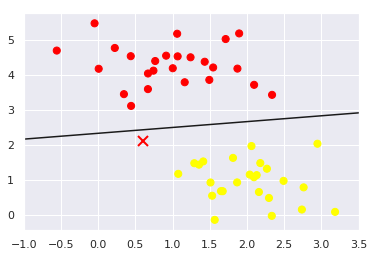

In [33]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

plt.plot(xfit, (-w[0,0] * xfit-b[0,0])/w[1,0], '-k')

plt.xlim(-1, 3.5);

In [67]:
from sklearn.svm import SVC
clf = SVC(C = 0.001, kernel = 'linear')
clf.fit(X, y.ravel()) 

print('w = ',clf.coef_)
print('b = ',clf.intercept_)

w =  [[ 0.23525694 -1.41250783]]
b =  [3.29634152]


In [65]:
class mySVC():
    def __init__(self):
        self.mu=[]#Lagrange multipliers
        self.w=[]# weights
        self.b=[]#bias
        
    def fit(self,X,y):
        #Initializing values and computing H. Note the 1. to force to float type
        m,n = X.shape
        y1 = np.where(y==0,-1,1).reshape(-1,1) * 1. #THIS IS FUNDAMENTAL
        H =  np.dot(X,X.T)*(y1.dot(y1.T))

        #Converting into cvxopt format
        P = cvxopt_matrix(H)
        q = cvxopt_matrix(-np.ones((m, 1)))
        G = cvxopt_matrix(-np.eye(m))
        h = cvxopt_matrix(np.zeros(m))
        A = cvxopt_matrix(y1.reshape(1, -1))
        b = cvxopt_matrix(np.zeros(1))
        #Setting solver parameters (change default to decrease tolerance) 
        cvxopt_solvers.options['show_progress'] = False
        cvxopt_solvers.options['abstol'] = 1e-10
        cvxopt_solvers.options['reltol'] = 1e-10
        cvxopt_solvers.options['feastol'] = 1e-10

        #Run solver
        sol = cvxopt_solvers.qp(P, q, G, h, A, b)
        self.mu = np.array(sol['x'])
        #w parameter in vectorized form
        self.w = ((y1 * self.mu).T @ X).reshape(-1,1)

        #Selecting the set of indices S corresponding to non zero parameters
        S = (self.mu > 1e-4).flatten()
        self.mu =self.mu[self.mu > 1e-4]

        #Computing b
        b = y1[S] - np.dot(X[S], w)
        self.b=b[0,0]

    def predict(self,Xtest):
        return ((np.sign(Xtest.dot(self.w)+self.b)+1.0)/2.0)[:,0]


In [66]:
clf = mySVC()
clf.fit(X, y.ravel()) 
clf.predict(X)-y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

## RBF

In [93]:
## RBF Kernel
from sklearn.metrics.pairwise import rbf_kernel
def K(X,Y, gamma=1.0):    
    return rbf_kernel(X,Y,gamma)

In [94]:
#Initializing values and computing H. Note the 1. to force to float type
m,n = X.shape
y1 = np.where(y==0,-1,1).reshape(-1,1) * 1. #THIS IS FUNDAMENTAL
H =  K(X,X)*y1.dot(y1.T)


#Converting into cvxopt format
P = cvxopt_matrix(H)
q = cvxopt_matrix(-np.ones((m, 1)))
G = cvxopt_matrix(-np.eye(m))
h = cvxopt_matrix(np.zeros(m))
A = cvxopt_matrix(y1.reshape(1, -1))
b = cvxopt_matrix(np.zeros(1))


In [114]:
#Setting solver parameters (change default to decrease tolerance) 
cvxopt_solvers.options['show_progress'] = False
cvxopt_solvers.options['abstol'] = 1e-10
cvxopt_solvers.options['reltol'] = 1e-10
cvxopt_solvers.options['feastol'] = 1e-10

#Run solver
sol = cvxopt_solvers.qp(P, q, G, h, A, b)
mu = np.array(sol['x'])
idx=mu[:,0] > 1e-7
mu=mu[idx,:]
support_vector_labels= y1[idx]
support_vectors=X[idx,:]
intercept=support_vector_labels[0]
for i in range(len(mu)):
    intercept -= mu[i,0]* support_vector_labels[i,0] * K(support_vectors[i:i+1,:], support_vectors[0:1,:])[0,0]


In [127]:
def prediction(xpred):
    y_pred = []
    # Iterate through list of samples and make predictions
    for sample in xpred:

        prediction = 0
        # Determine the label of the sample by the support vectors
        for i in range(len(mu)):
            prediction += mu[i,0] * support_vector_labels[
                i,0] * K(support_vectors[i:i+1,:], np.atleast_2d(sample))[0,0]
        prediction += intercept
        y_pred.append(np.sign(prediction))
    return np.array(y_pred)
    


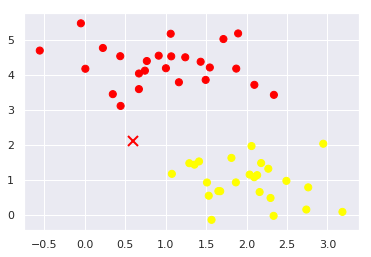

In [129]:
y_pred=prediction(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred[:,0], s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)



## Linear programming
Linear programming involves solving optimization problems with linear objective functions and linear constraints. 
Many problems are naturally described by linear programs, including problems from fields as diverse as 
* transportation
* communication networks
* manufacturing
* economics
* operations research.

Many problems that are not naturally linear can often be approximated by linear
programs. Several methods have been developed for exploiting the linear structure. 
Modern techniques and hardware can globally minimize problems with
millions of variables and millions of constraint.

## Canonical form of linear programming
Minimize
$$f(x) = c^T x, \qquad x = (x_1,\ldots x_n)^T$$

subject to $m$ equality constraints
$$ Ax \leq b, \qquad A\text{ is } m\times n\text{ matrix}$$

and $$x_i \ge 0, \qquad i=1,\ldots, n$$

It is linear because both optimization functions and constraints are linear functions of the variables.

### Example 

Minimize $$ f(x) = x_1 + 2 x_2 $$

subject to $$ x_1+x_2 \leq 2$$

and $$x_i \ge 0$$

[-1, 5, -1, 4]

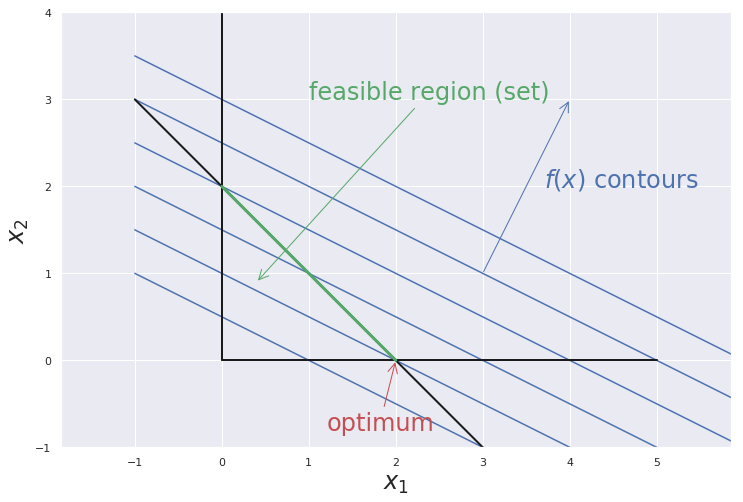

In [20]:
plt.figure(figsize=(12,8)); x1 = np.array([-1, 6])
for fx in [1, 2, 3, 4, 5, 6]:
    plt.plot(x1, (fx-x1)/2.0, "b-")
plt.plot(x1, 2-x1, "k", linewidth=2)
plt.plot([0,5], [0,0], "k", linewidth=2);plt.plot([0,0], [0,4], "k", linewidth=2);plt.plot([0,2], [2,0], "g", linewidth=3)
plt.annotate(s='feasible region (set)', xy=(0.4,0.9), xytext=(1,3), arrowprops=dict(arrowstyle='->',color="g"), color="g", fontsize=24)
plt.annotate(s='optimum', xy=(2,0), xytext=(1.2,-0.8), arrowprops=dict(arrowstyle='->',color="r"), color="r", fontsize=24)
plt.annotate(s='', xy=(4,3), xytext=(3,1), arrowprops=dict(arrowstyle='->',color="b"), fontsize=24)
plt.text(3.7, 2, "$f(x)$ contours", fontsize=24, color="b"); plt.xlabel("$x_1$", fontsize=24); plt.ylabel("$x_2$", fontsize=24); plt.axis('tight'); plt.axis('equal'); plt.axis([-1,5,-1,4])




The equality constraint and the bounds define the feasible region.
The linear objective function defines a series of parallel lines as the contours of constant $f$.
The minimum value of $f$ is the first of these to intersect the feasible region as $f$ increases. 



maximize 
$$
Z = 6x_1 + 8x_2
$$
subject to
$$
5x_1+10x_2 \leq 55
$$
$$
4x_1+4x_2 \leq 41
$$
and $x_1,x_2 >= 0$

## Simplex Method or Interior Point Method


In [26]:
from scipy.optimize import linprog
c=np.array([6,8])
A=np.array([[5,10],[4,4]])
b=np.array([[55],[41]])
linprog(-c,A,b)

     con: array([], dtype=float64)
     fun: -63.0
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([0., 0.])
  status: 0
 success: True
       x: array([9.5 , 0.75])

The optimal solution is

$$
x_1=9.5, ~~x_2=0.75
$$

and the final profit is

$$
Z=63
$$

## Integer Linear Programming

In the above problem, a fractional solution may not be acceptable because we cannot produce 0.5 product P1 

maximize 
$$
Z = 6x_1 + 8x_2
$$
subject to
$$
5x_1+10x_2 \leq 55
$$
$$
4x_1+4x_2 \leq 41
$$
and $x_1,x_2 >= 0$ and **Integer**